In [5]:
# -------------------------------------------------
# Initial import.
# -------------------------------------------------

import numpy as np
import matplotlib,pylab as plt
import tensorflow as tf
from scipy.io import loadmat 


In [6]:
dataset = loadmat('detop_exp01_subj22_Sess1_003.mat')

In [7]:
type(dataset)

dict

In [8]:
dataset

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Jun  5 19:43:35 2018',
 '__version__': '1.0',
 'channels_emg': array(['MA1 ', 'MA2 ', 'MA3 ', 'MA4 ', 'MA5 ', 'MA6 ', 'MA7 ', 'MA8 ',
        'MA9 ', 'MB1 ', 'MB2 ', 'MB3 ', 'MB4 ', 'MB4 ', 'MB5 ', 'MB6 ',
        'MB7 ', 'MB9 ', 'MC1 ', 'MC2 ', 'MC3 ', 'MC4 ', 'MC5 ', 'MC6 ',
        'MC7 ', 'MC8 ', 'MC9 ', 'MD1 ', 'MD2 ', 'MD3 ', 'MD4 ', 'MD5 ',
        'MD6 ', 'MD7 ', 'MD8 ', 'MD9 ', 'ME1 ', 'ME2 ', 'ME3 ', 'ME4 ',
        'ME5 ', 'ME6 ', 'ME7 ', 'ME8 ', 'ME9 ', 'MF1 ', 'MF2 ', 'MF3 ',
        'MF4 ', 'MF5 ', 'MF6 ', 'MF7 ', 'MF8 ', 'MF9 ', 'MG1 ', 'MG2 ',
        'MG3 ', 'MG4 ', 'MG5 ', 'MG6 ', 'MG7 ', 'MG8 ', 'MG9 ', 'MH1 ',
        'MH2 ', 'MH3 ', 'MH4 ', 'MH5 ', 'MH6 ', 'MH7 ', 'MH8 ', 'MH9 ',
        'MI1 ', 'MI2 ', 'MI3 ', 'MI4 ', 'MI5 ', 'MI6 ', 'MI7 ', 'MI8 ',
        'MI9 ', 'MJ1 ', 'MJ2 ', 'MJ3 ', 'MJ4 ', 'MJ5 ', 'MJ6 ', 'MJ7 ',
        'MJ8 ', 'MJ9 ', 'MK1 ', 'MK2 ', 'MK3 ', 'MK4 ', 

In [9]:
keys_name = dataset.keys()
keys_name

dict_keys(['__globals__', 'subject', '__version__', 'session', 'movement', '__header__', 'date', 'fs', 'channels_emg', 'emg', 'channels_glove', 'glove'])

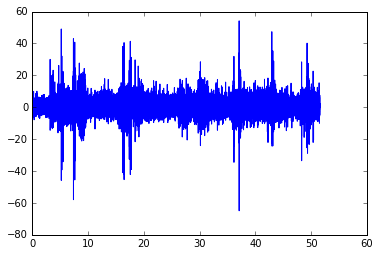

In [10]:
y1 = dataset['glove'][0]
y2 = dataset['emg'][0]
time = np.zeros(len(y1))

for i in range(0, len(y1)):
    time[i] = i/2048

plt.plot(time, y2)
plt.show()

In [11]:
cutnum = len(y2)%40

y2_cut = np.delete(y2, [len(y1) - cutnum, len(y1)])

y2_process1 = np.zeros(int(len(y2_cut)/10))

for i in range(0, int(len(y2_cut)/10)):
    for j in range(0, 10):
        y2_process1[i] = y2_process1[i] + abs(y2_cut[10*i+j])
        
y2_process1 = y2_process1 / 10

time2 = np.zeros(int(len(y2_cut)/10))

for i in range(0, int(len(y2_cut)/10)):
    time2[i] = i/2048*10

y2_process2 = np.zeros(shape = (int(len(y2_process1)/4), 4))

for i in range(0, int(len(y2_process1)/4)):
    for j in range(0,4):
        y2_process2[i,j] = y2_process1[i*4+j]

y2_process2.shape
#plt.plot(time2, y2_process1)
#plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  This is separate from the ipykernel package so we can avoid doing imports until


(2639, 4)

In [13]:
y1_cut = np.delete(y1, [len(y1) - cutnum, len(y1)])

y1_process1 = np.zeros(int(len(y1_cut)/40))

for i in range(0, int(len(y1_cut)/40)):
    for j in range(0, 40):
        y1_process1[i] = y1_cut[40*i+j]*100

y1_process1[900]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  """Entry point for launching an IPython kernel.


133.33333333333331

In [14]:
t_s_x = y2_process2
t_s_angles = y1_process1

In [24]:
t_s_x = np.reshape(t_s_x, [-1, MAX_STEPS, Timeseries_features])
print(t_s_x)
print(t_s_angles)

ValueError: cannot reshape array of size 1 into shape (4,1)

In [16]:
permutation = np.random.permutation(t_s_angles.shape[0])
shuffled_t_s_x = t_s_x[permutation, :]
shuffled_t_s_angles = t_s_angles[permutation]

In [17]:
print(shuffled_t_s_x)
print(shuffled_t_s_angles)

[[ 5.65183881  1.23717363  2.90359205  1.9379205 ]
 [ 2.64718477  1.10275089  1.97784518  1.53443484]
 [ 4.0640812   3.23495579  2.20293103  1.57658068]
 ..., 
 [ 4.56615996  6.10011426  5.10125313  5.79553665]
 [ 2.55521372  4.63751904  1.15587675  4.29473341]
 [ 1.92953887  1.24911643  3.46992168  1.01465959]]
[   0.            0.            5.12820513 ...,   84.61538462  123.07692308
  123.07692308]


In [18]:
# -------------------------------------------------
# Global Parameters Declaration.
# -------------------------------------------------

BATCH_SIZE = 1 # Batch size, wait for data pre-processing finished.
MAX_STEPS = 4 # Maximum length of one sample (time-series data), wait for data pre-processing finished.
ITERS = 1 # How many generator iterations to train for, wait for data pre-processing finished.
LR = 0.1 # Learning rate, COPY from origin programe.
Timeseries_features = 1 # Time-series feature size,if only use average value per 50ms then it would be 1.
                       # However, considering about the possibility of using sEMG image, it could be much more larger.
NUM_ANGLES = 0 # Numbers of angles, depends on how exact i want, wait for data pre-processing finished.
LSTM_UNIT = 4 # Numbers of LSTM unit, depends on how many steps i want,wait for data pre-processing.

In [19]:
# -------------------------------------------------
# Dividing Training Data and Testing Data.
# Wait for data pre-processing finished.
# -------------------------------------------------

train_t_s_x = shuffled_t_s_x[0:2400]
train_t_s_angles = shuffled_t_s_angles[0:2400]
test_t_s_x = shuffled_t_s_x[2400:2639]
test_t_s_angles = shuffled_t_s_angles[2400:2639]

print(train_t_s_x.shape)
print(train_t_s_angles.shape)
print(test_t_s_x.shape)
print(test_t_s_angles.shape)

(2400, 4)
(2400,)
(239, 4)
(239,)


In [20]:
tf.reset_default_graph()

# -------------------------------------------------
# T-S RNN Structrue.
# -------------------------------------------------

W_1 = tf.Variable(tf.random_normal([LSTM_UNIT, 1]))
bias1 = tf.Variable(tf.constant(0.1, shape = [1, ]))
W_2 = tf.Variable(tf.random_normal([LSTM_UNIT, 1]))
bias2 = tf.Variable(tf.constant(0.1, shape = [1, ]))

def TSRNN(t_s_input):
    
    t_s_input = tf.reshape(t_s_input, [-1, MAX_STEPS, Timeseries_features])
    
    cell = tf.contrib.rnn.BasicLSTMCell(LSTM_UNIT)
    init_state = cell.zero_state(BATCH_SIZE, tf.float32)
    lstm_output, final_state = tf.nn.dynamic_rnn(cell, t_s_input, initial_state=init_state)
    lstm_output = tf.reshape(lstm_output, [-1, LSTM_UNIT])
    
    pred_angle = tf.matmul(lstm_output, W_1) + bias1 # tanh?
    
    pred_angle = tf.reshape(pred_angle, [-1, LSTM_UNIT])
    
    pred_angle = tf.matmul(pred_angle, W_2) +bias2
    
    print(pred_angle.shape, W_1)
    
    return pred_angle

# -------------------------------------------------
# T-S RNN Model Training.
# -------------------------------------------------

def Train_TSRNN():
    # Place Holder before training the nets.
    t_s_X = tf.placeholder(tf.float32, shape = [MAX_STEPS])
    t_s_Y = tf.placeholder(tf.float32, shape = []) # Not sure it is correct?
    
    train_data = train_t_s_x
    train_label = train_t_s_angles
    
    pred =  TSRNN(t_s_X)
    
    loss = tf.square(pred - t_s_Y)
    train_op = tf.train.AdamOptimizer(LR).minimize(loss) # optimizer?
    
    #train_op = tf.train.RMSPropOptimizer(learning_rate=LR).minimize(loss)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
    
        for i in range(0, 2400):
            _, loss_currency = sess.run([loss, train_op], feed_dict={t_s_X: train_data[i], t_s_Y: train_label[i]})
            
            print(loss_currency)

In [21]:
Train_TSRNN()

(1, 1) <tf.Variable 'Variable:0' shape=(4, 1) dtype=float32_ref>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
